In [2]:
#Import Dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
#Data Collection & loading the dataset to a pandas dataframe
wine = pd.read_csv('winequality-red.csv', delimiter = ';')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#checking for missing values
wine.isnull().sum() 
#no missing values to drop

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#statistical measures of the dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


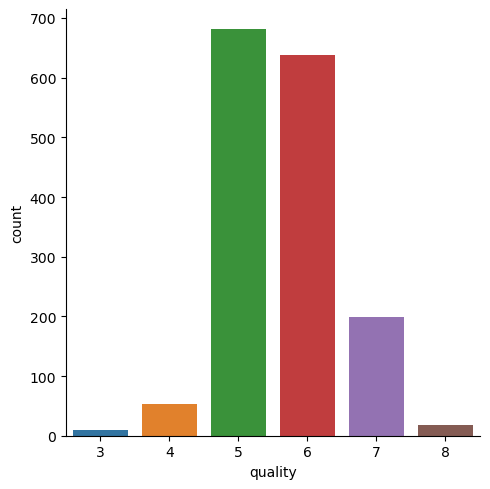

In [8]:
#number of values for each quality. trying to show count vs quality. 
sns.catplot(x = "quality" , data = wine, kind = "count")

<Axes: xlabel='quality', ylabel='volatile acidity'>

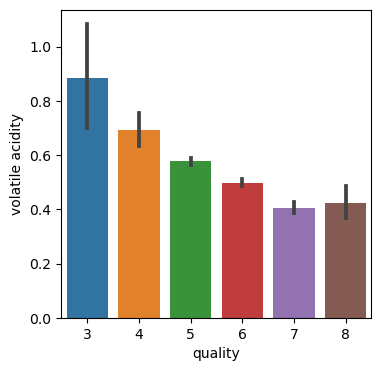

In [9]:
#volatile acidity vs quality (TO SEE WHAT AFFECTS QUALITY AND WHAT DOES NOT)
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='volatile acidity', data = wine)
#The higher the volatile acidity, the worse the quality. so it is inversely proportional / has a negative correlation. 

<Axes: xlabel='quality', ylabel='citric acid'>

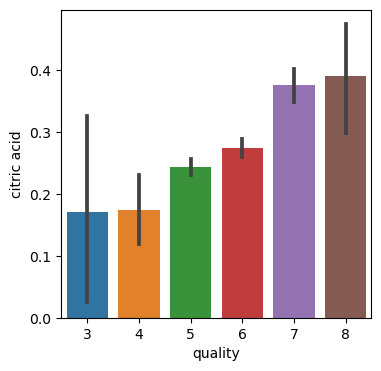

In [10]:
#comparing citric acid and quality (TO SEE WHAT AFFECTS QUALITY AND WHAT DOES NOT)
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='citric acid', data = wine)
#The higher the citric acidity, the higher the quality. so it is directly proportional / has a positive correlation. 

<Axes: >

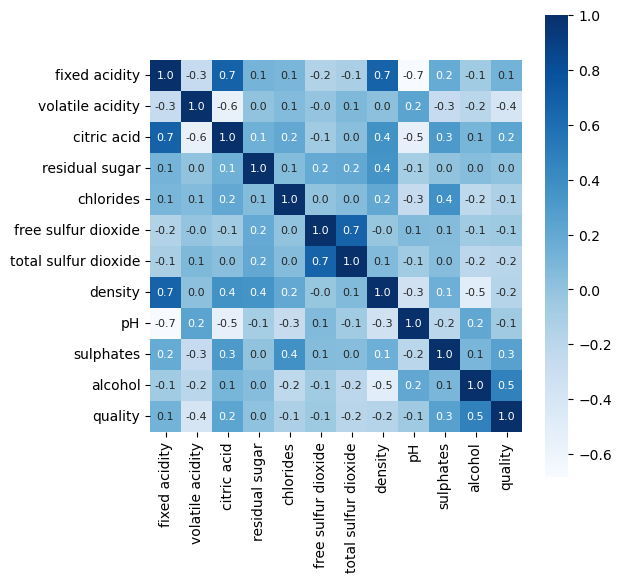

In [11]:
#checking correlation with heatmap
correlations = wine.corr()

plt.figure(figsize=(6,6))
sns.heatmap(correlations,cbar=True, square =True, fmt = '.1f', annot = True, annot_kws={'size' :8}, cmap = 'Blues')
#cbar = the bar beside the plot
#fmt = the rounding up of numbers in the box
#annot = the numbers in the plot
#annot_kws = the size of the numbers in the plot
#we already saw the volatile acidity

In [12]:
#Data Processing
#separate label(quality) from the rest of the columns
#when dropping only columns the axis is 1, when dropping rows the axis is 0
x = wine.drop('quality', axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [13]:
#label binarization/label encoding. - changing the quality to good and bad only to aid judging on the wine quality 
y = wine['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
#lambda function helps with replacing. so its the dataset[the column] and the apply function.
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [14]:
#train and test data split
#created 4 variables and put 0.2(20%) of the data to be test data and 0.8 (80%) will be training data.
#y is the label data which is now zeroes and ones, and x is the one defined earlier that is every column except the label (the code where we dropped the label data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3)


In [15]:
#basically '100%', '80%' and '20%'
print(y.shape, y_train.shape,y_test.shape )

(1599,) (1279,) (320,)


In [16]:
#Model Training 
#Random Forest Classifier - a model of multiple decision trees
model = RandomForestClassifier()

In [17]:
#using the fit function to fit the data to the random forest classifier
model.fit(x_train, y_train)

RandomForestClassifier()

In [95]:
#Evaluate the model. Model Evaluation to find out how well our model is performing
#Using accuracy score
#accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [96]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.91875


### Building the Predictive System

In [101]:
#finding the quality when other parameters are given.
input_data = (7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as i predict the label for just one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 1):
    print('This wine is of Good Quality')
else:
    print('This wine is of Bad quality')

[1]
This wine is of Good Quality


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
